In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread, imshow
import cv2

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")

from subprocess import check_output
import glob

import PIL
from PIL import Image

In [2]:
#Setting each path to the folders for each type of cervix
basepath = "/Users/keerat/dev/AOSResearch/resources/Train/"
path_type1 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_1"
path_type2 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_2"
path_type3 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_3"
paths = [path_type1, path_type2, path_type3]

#glob will sort through each folder(Type 1, 2, 3) and return the information in it as a list
type1_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_1/*.jpg")
type2_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_2/*.jpg")
type3_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_3/*.jpg")

#all_cervix_images holds all the data
all_cervix_images = type1_cervix_images + type2_cervix_images + type3_cervix_images

#checking the number of each cervix type 
print("The number of Type 1 cervices is {}.".format((len(type1_cervix_images))))
print("The number of Type 2 cervices is {}.".format((len(type2_cervix_images))))
print("The number of Type 3 cervices is {}.".format((len(type3_cervix_images))))
print("The total number of all cervices is {}.".format((len(all_cervix_images))))

#The data has been transported inton a dataframe
all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

The number of Type 1 cervices is 248.
The number of Type 2 cervices is 780.
The number of Type 3 cervices is 450.
The total number of all cervices is 1478.


imagepath filetype    type
0  /Users/keerat/dev/AOSResearch/resources/Train/...      jpg  Type_1
1  /Users/keerat/dev/AOSResearch/resources/Train/...      jpg  Type_1
2  /Users/keerat/dev/AOSResearch/resources/Train/...      jpg  Type_1
3  /Users/keerat/dev/AOSResearch/resources/Train/...      jpg  Type_1
4  /Users/keerat/dev/AOSResearch/resources/Train/...      jpg  Type_1

In [3]:
def equalize(f):
    h = np.histogram(f, bins=np.arange(257))[0]
    H = np.cumsum(h) / float(np.sum(h))
    e = np.floor(H[f.flatten().astype("int")]*256.)
    return e.reshape(f.shape)

In [4]:
equalizedType1 = []
i = 0
for t in all_cervix_images[all_cervix_images['type'] == 'Type_1']['imagepath'].head(40):
    print('{}: {}'.format(i, Image.open(t).size))
    i+=1
    equalizedType1.append(equalize(plt.imread(t)))

equalizedType2 = []
for t in all_cervix_images[all_cervix_images['type'] == 'Type_2']['imagepath'].head(40):
    print('{}: {}'.format(i, Image.open(t).size))
    i+=1
    equalizedType2.append(equalize(plt.imread(t)))
    
equalizedType3 = []
for t in all_cervix_images[all_cervix_images['type'] == 'Type_3']['imagepath'].head(40):
    print('{}: {}'.format(i, Image.open(t).size))
    i+=1
    equalizedType3.append(equalize(plt.imread(t)))

0: (3264, 3917)
1: (3264, 3917)
2: (3264, 3917)
3: (3264, 3917)
4: (3264, 3917)
5: (3264, 3917)
6: (3264, 3917)
7: (3264, 3917)
8: (3264, 3917)
9: (3264, 3917)
10: (3264, 3917)
11: (3264, 3917)
12: (3264, 3917)
13: (3264, 3917)
14: (3264, 3917)
15: (3264, 3917)
16: (3264, 3917)
17: (3264, 3917)
18: (3264, 3917)
19: (3264, 3917)
20: (3264, 3917)
21: (3264, 3917)
22: (3264, 3917)
23: (3264, 3917)
24: (3264, 3917)
25: (3264, 3917)
26: (3264, 3917)
27: (3264, 3917)
28: (3264, 3917)
29: (3264, 3917)
30: (3264, 3917)
31: (3264, 3917)
32: (3264, 3917)
33: (3264, 3917)
34: (3264, 3917)
35: (3264, 3917)
36: (3264, 3917)
37: (3264, 3917)
38: (3264, 3917)
39: (3264, 3917)
40: (3264, 3917)
41: (3264, 3917)
42: (3264, 3917)
43: (3264, 3917)
44: (3264, 3917)
45: (3264, 3917)
46: (3264, 3917)
47: (3264, 3917)
48: (3264, 3917)
49: (3264, 3917)
50: (3264, 3917)
51: (3264, 3917)
52: (3264, 3917)
53: (3264, 3917)
54: (3264, 3917)
55: (3264, 3917)
56: (3264, 3917)
57: (3264, 3917)
58: (3264, 3917)
59: (32

In [5]:
sizes = []
sizes_files = []
for filepath in all_cervix_images['imagepath']:
    if(Image.open(filepath).size not in sizes):
        sizes.append(Image.open(filepath).size)
        sizes_files.append(filepath)
for a in sizes_files:
    print(type(a))
    print(Image.open(a).size)

<class 'str'>
(3264, 3917)
<class 'str'>
(3120, 4160)
<class 'str'>
(2340, 4160)
<class 'str'>
(3264, 2448)


In [6]:
equalizedSizes = []
i = 0
for t in sizes_files:
    print('{}: {}'.format(i, Image.open(t).size))
    i+=1
    equalizedSizes.append(equalize(plt.imread(t)))

0: (3264, 3917)
1: (3120, 4160)
2: (2340, 4160)
3: (3264, 2448)


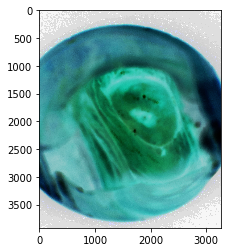

In [8]:
plt.imshow(equalizedSizes[0])

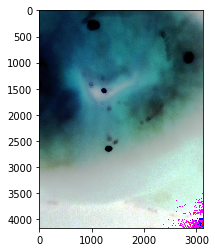

In [9]:
plt.imshow(equalizedSizes[1])

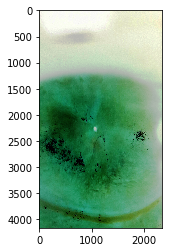

In [10]:
plt.imshow(equalizedSizes[2])

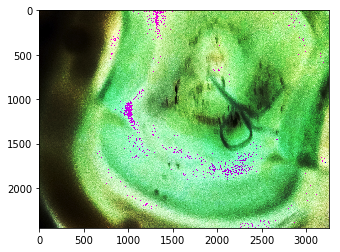

In [11]:
plt.imshow(equalizedSizes[3])

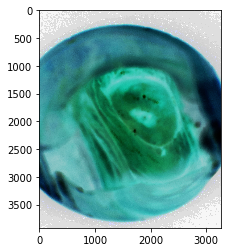

In [29]:
a = equalizedType1[0]
plt.imshow(a)
print(Image.open(a).size)

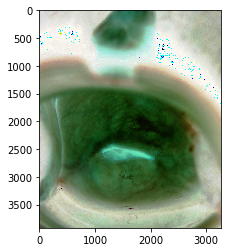

In [30]:
for a in 

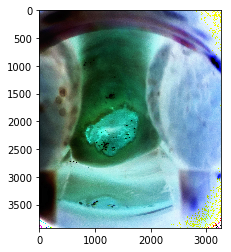

In [31]:
plt.imshow(equalizedType1[2])

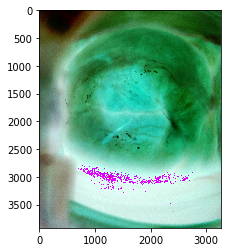

In [32]:
plt.imshow(equalizedType1[3])

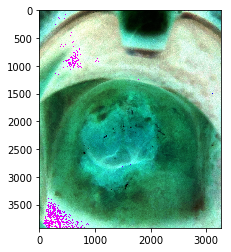

In [33]:
plt.imshow(equalizedType1[4])

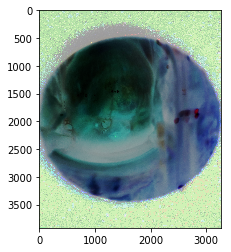

In [34]:
plt.imshow(equalizedType1[5])

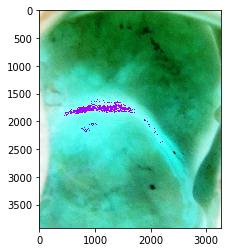

In [35]:
plt.imshow(equalizedType1[6])

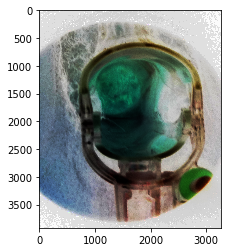

In [36]:
plt.imshow(equalizedType1[7])

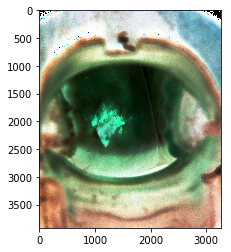

In [37]:
plt.imshow(equalizedType1[8])

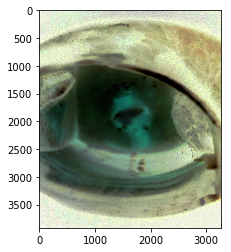

In [38]:
plt.imshow(equalizedType1[9])

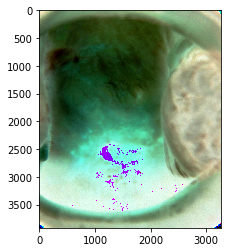

In [39]:
plt.imshow(equalizedType1[10])

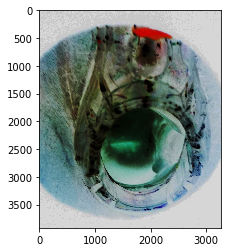

In [40]:
plt.imshow(equalizedType2[0])

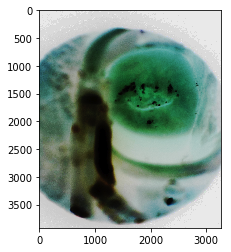

In [41]:
plt.imshow(equalizedType2[1])

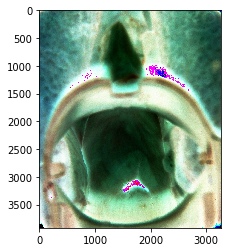

In [42]:
plt.imshow(equalizedType2[2])

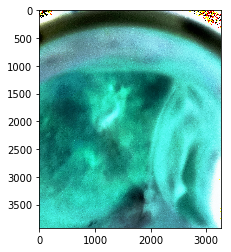

In [43]:
plt.imshow(equalizedType2[3])

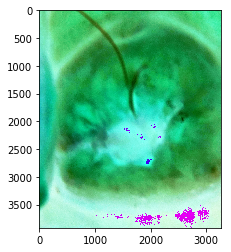

In [44]:
plt.imshow(equalizedType2[4])

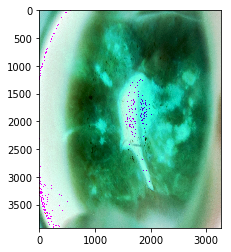

In [45]:
plt.imshow(equalizedType2[5])

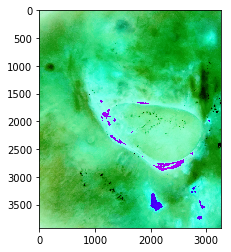

In [46]:
plt.imshow(equalizedType2[6])

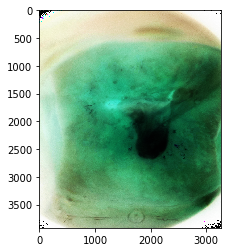

In [47]:
plt.imshow(equalizedType2[7])

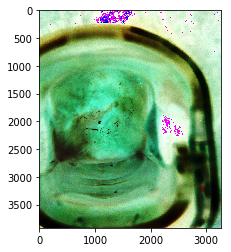

In [48]:
plt.imshow(equalizedType2[8])

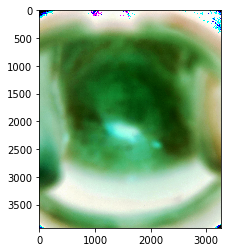

In [49]:
plt.imshow(equalizedType2[9])

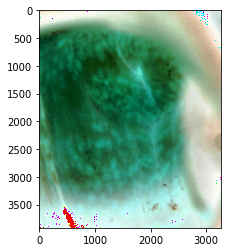

In [50]:
plt.imshow(equalizedType2[10])

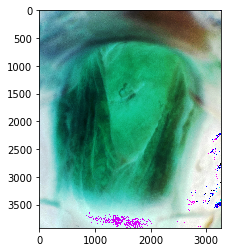

In [51]:
plt.imshow(equalizedType3[0])

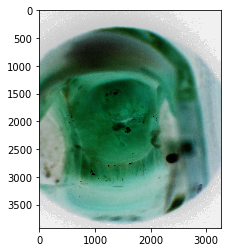

In [52]:
plt.imshow(equalizedType3[1])

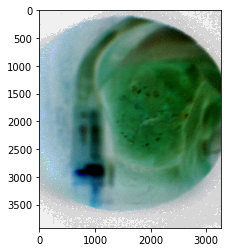

In [53]:
plt.imshow(equalizedType3[2])

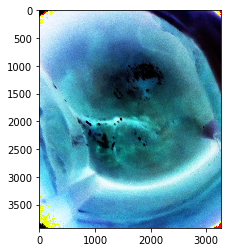

In [54]:
plt.imshow(equalizedType3[3])

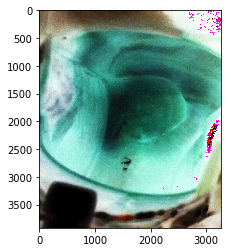

In [55]:
plt.imshow(equalizedType3[4])

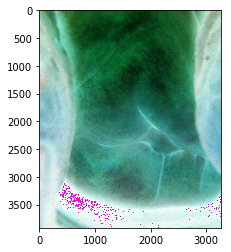

In [56]:
plt.imshow(equalizedType3[5])

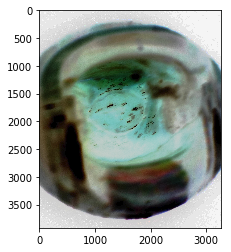

In [57]:
plt.imshow(equalizedType3[6])

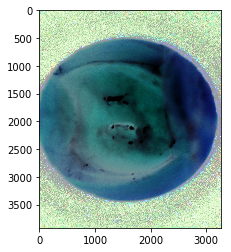

In [58]:
plt.imshow(equalizedType3[7])

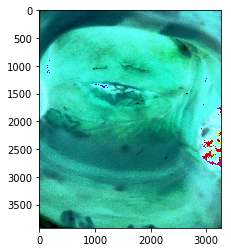

In [59]:
plt.imshow(equalizedType3[8])

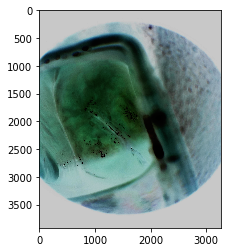

In [60]:
plt.imshow(equalizedType3[9])

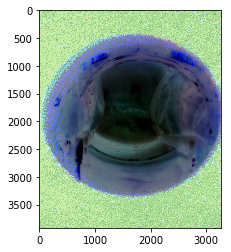

In [61]:
plt.imshow(equalizedType3[10])